# Aim of The Project

## Why machines are damaged?


Perform analysis on the given data to analyze **"Why machines are damaged?"**<br>

Given dataset contains contains data of 1000 machines of a factory, data collected includes some properties of the machines like -<br>

    1. Lifetime of the machines in months
    2. The condition of the machines when the data was recorded (1 = 
    damaged, 0 = not damaged)
    3. Pressure
    4. Moisture
    5. Temperature
    6. Team - Team A, B or C - the team which was handling the machine
    7. Provider - manufacturer or seller of the machine

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/anshupandey/Machine_Learning_Training/master/datasets/maintenance_data.csv"
df = pd.read_csv(url)
df

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider
0,56,0,92.178854,104.230204,96.517159,TeamA,Provider4
1,81,1,72.075938,183.065701,87.271062,TeamC,Provider4
2,60,0,96.272254,77.801376,112.196170,TeamA,Provider1
3,86,1,94.406461,178.493608,72.025374,TeamC,Provider2
4,34,0,97.752899,99.413492,103.756271,TeamB,Provider1
...,...,...,...,...,...,...,...
995,88,1,88.589759,112.167556,99.861456,TeamB,Provider4
996,88,1,116.727075,110.871332,95.075631,TeamA,Provider4
997,22,0,104.026778,88.212873,83.221220,TeamB,Provider1
998,78,0,104.911649,104.257296,83.421491,TeamA,Provider4


In [3]:
df.head()

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider
0,56,0,92.178854,104.230204,96.517159,TeamA,Provider4
1,81,1,72.075938,183.065701,87.271062,TeamC,Provider4
2,60,0,96.272254,77.801376,112.196170,TeamA,Provider1
3,86,1,94.406461,178.493608,72.025374,TeamC,Provider2
4,34,0,97.752899,99.413492,103.756271,TeamB,Provider1


## Data Exploration

In [4]:
df.head()

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider
0,56,0,92.178854,104.230204,96.517159,TeamA,Provider4
1,81,1,72.075938,183.065701,87.271062,TeamC,Provider4
2,60,0,96.272254,77.801376,112.196170,TeamA,Provider1
3,86,1,94.406461,178.493608,72.025374,TeamC,Provider2
4,34,0,97.752899,99.413492,103.756271,TeamB,Provider1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
lifetime          1000 non-null int64
broken            1000 non-null int64
pressureInd       996 non-null float64
moistureInd       1000 non-null float64
temperatureInd    997 non-null float64
team              1000 non-null object
provider          1000 non-null object
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


**Analysis from df.info( ) :-**

    - Data has some missing values (pressureInd and temperatureInd)
    - Team and Provider columns are string format

In [6]:
df.team.unique()

array(['TeamA', 'TeamC', 'TeamB'], dtype=object)

In [7]:
df.provider.unique()

array(['Provider4', 'Provider1', 'Provider2', 'Provider3'], dtype=object)

In [8]:
# Statistical data of the dataset for each integer / float type column
df.describe()

,lifetime,broken,pressureInd,moistureInd,temperatureInd
count,1000.000000,1000.000000,996.000000,1000.000000,997.000000
mean,55.195000,0.397000,98.681100,111.088723,100.553499
std,26.472737,0.489521,19.879703,41.839005,19.592059
min,1.000000,0.000000,33.481917,70.928815,42.279598
25%,34.000000,0.000000,85.562282,94.532547,87.672094
50%,60.000000,0.000000,97.311091,102.844084,100.528015
75%,80.000000,1.000000,112.253190,113.532970,113.522496
max,93.000000,1.000000,173.282541,1156.493254,172.544140


We observe that there might be an outlier in the moistureInd as the **max data** is deviated by quite a large amount.

# Data Cleaning

In [9]:
# We check for duplicate entries
df.duplicated().sum()

0

#### We can observe that - don't have any duplicated entries of machines or duplicated rows, otherwise we'd have to drop them.

In [10]:
# Now, we check for missing values
df.isnull().sum()

lifetime          0
broken            0
pressureInd       4
moistureInd       0
temperatureInd    3
team              0
provider          0
dtype: int64

**From the above observation we conclude that :**

1. pressureInd has 4 missing values
2. temperatureInd has 3 missing values

**Steps to deal with the missing values :**

- We wouldn't want to drop the rows with missing values in this approach, as for the sake of one missing value we wouldn't want to drop the real values in the other columns
- We would rather fill in those missing values by statistical value - mean / median / mode

### Guidelines to handle missing values
1. **If data - Categorical** (string type)
   - Nominal : Mode
   - Ordinal : Median<br><br>
2. **If data - Numeric - check Skewness**
   - Skewed distribution : Median
   - Normal distribution : Mean<br><br>

**To check for Skewness :**

    if Skewness is between -0.1 to +0.1:
        Normal Distribution
    else:
        Skewed Distribution

In [11]:
df.skew()

lifetime          -0.407597
broken             0.421663
pressureInd        0.117541
moistureInd       15.982324
temperatureInd    -0.070839
dtype: float64

In [12]:
# Missing values for temperature is almost close to 0, so we fill it with mean
df.temperatureInd.fillna(df.temperatureInd.mean(),inplace=True)
# Missing values for pressure > +0.1, so we fill it with median
df.pressureInd.fillna(df.pressureInd.median(),inplace=True)
df.isnull().sum()

lifetime          0
broken            0
pressureInd       0
moistureInd       0
temperatureInd    0
team              0
provider          0
dtype: int64

### Handling Outliers (Unnatural situations)

    If skewness > +1 or skewness < -1 = Outlier present

In [13]:
df.skew()

lifetime          -0.407597
broken             0.421663
pressureInd        0.118601
moistureInd       15.982324
temperatureInd    -0.070945
dtype: float64

**From the above values of skewness we observe that :**<br>

- moistureInd has an outlier as skewness > +1

In [14]:
df.shape

(1000, 7)

<function matplotlib.pyplot.show(*args, **kw)>

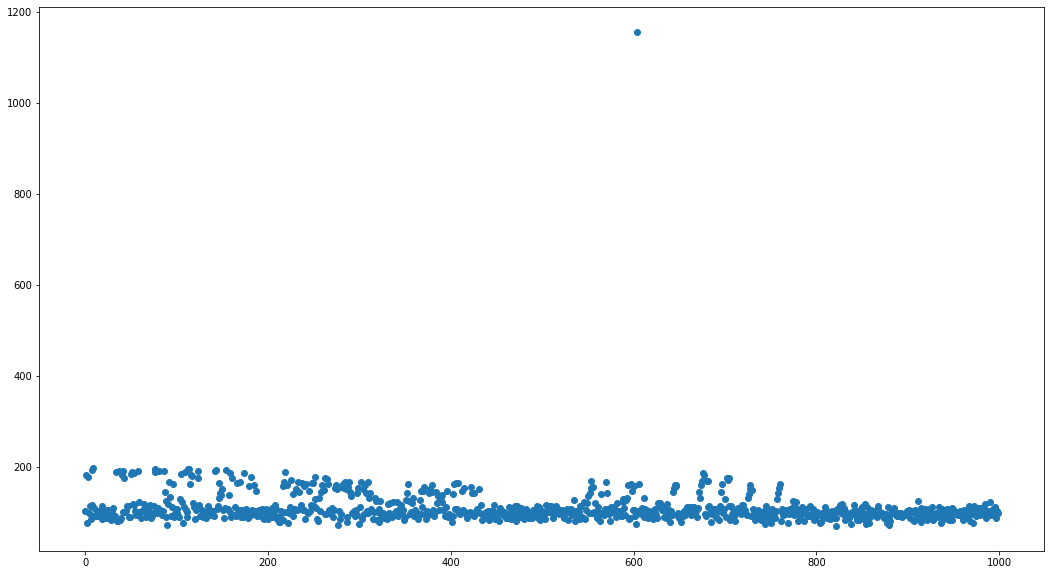

In [15]:
plt.figure(figsize=(18,10))
plt.scatter(df.index, df.moistureInd)
plt.show

### From the above plot : 

    We observe that one of the moistureInd value is almost close to 1200
    That is an exceptional value which is leading to skewness > +1

In [16]:
# Drop the row which contains the outlier value
df = df[df.moistureInd<1000]
df.shape

(999, 7)

In [17]:
df.skew()

lifetime         -0.405939
broken            0.424245
pressureInd       0.118158
moistureInd       1.588525
temperatureInd   -0.071432
dtype: float64

# Exploratory Data Analytics

    - EDA using Data Visualization
        - Univariate : Analyze one attribute at a time 
        - Bivariate  : Analyze the impact of one attribute on the other
        - Multivariate : Analyze impact of multiple attributes on the target
        
    - EDA using Statistics


In [18]:
df.columns

Index(['lifetime', 'broken', 'pressureInd', 'moistureInd', 'temperatureInd',
       'team', 'provider'],
      dtype='object')

### Univariate Analytics

    1. for numeric - histrogram plot
    2. for categorical - barplot

In [19]:
df.head()

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider
0,56,0,92.178854,104.230204,96.517159,TeamA,Provider4
1,81,1,72.075938,183.065701,87.271062,TeamC,Provider4
2,60,0,96.272254,77.801376,112.196170,TeamA,Provider1
3,86,1,94.406461,178.493608,72.025374,TeamC,Provider2
4,34,0,97.752899,99.413492,103.756271,TeamB,Provider1


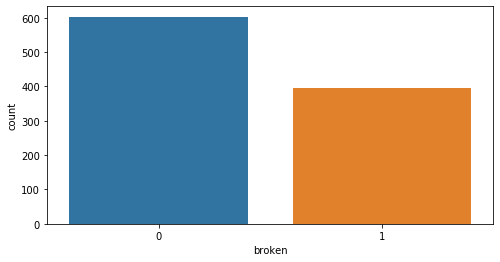

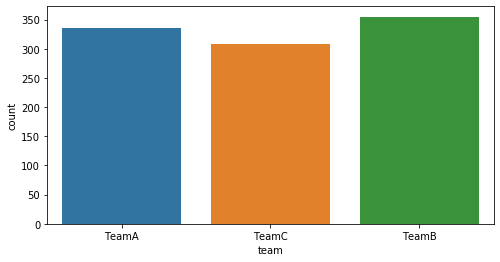

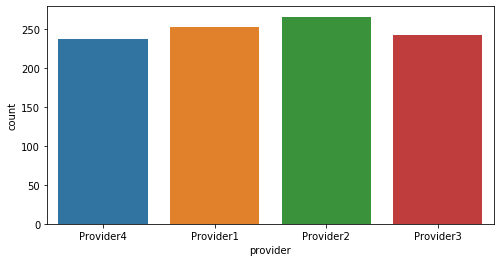

In [20]:
# Categorical attributes - Barplots
cats = ['broken',
       'team', 'provider']

for col in cats:
    plt.figure(figsize=(8,4))
    sns.countplot(df[col]) # X axis : represents the categories in the categorical data and Y axis : represents the occurence of the data - count of machines
    plt.show()

**Analytics -**
    - Almost 40% of machines are damaged / broken
    - Almost all teams are handling / managing equal number of machines
    - The no. of machines purchased from each provider are constant 

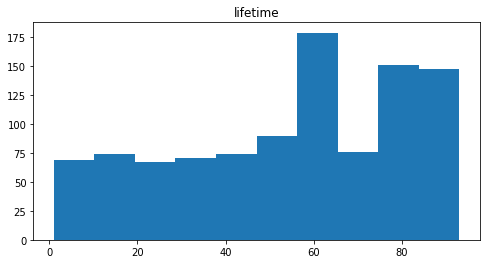

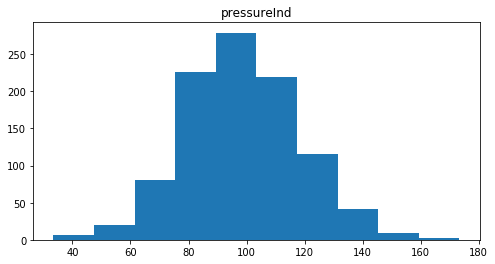

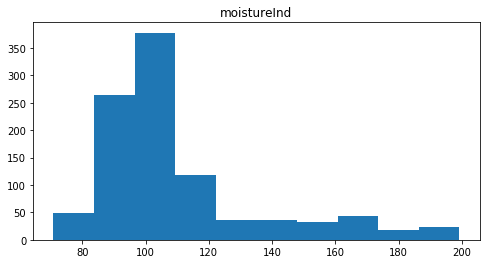

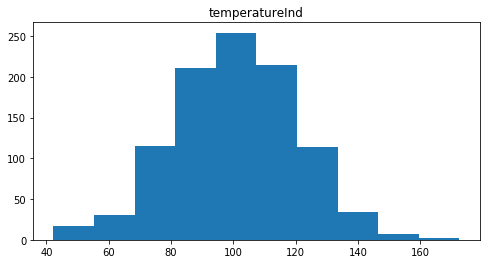

In [21]:
# Numerical data - Histogram Plot

numeric = ['lifetime', 'pressureInd', 'moistureInd', 'temperatureInd']

for col in numeric:
    plt.figure(figsize=(8,4))
    plt.hist(df[col])
    plt.title(col)
    plt.show()

**Analytics from the above plot -** 
    - Lifetime has a skewed (negative) distribution, there are some values having lower values of lifetime
    - Pressure is normally distributed, most of the machines being operated between 80 to 120
    - Temperature is normally distributed, with most machines being operated with temperature b/w 70 to 100
    - Moisture is skewed distribution, with few machines having exceptionally higher moisture

## Bivariate Analytics

Types of analytics -     
    - Numeric v/s Categorical     : Probability distribution of data - distplot
    - Categorical v/s Categorical : Barplots
    - Numeric v/s Numeric         : Scatterplot

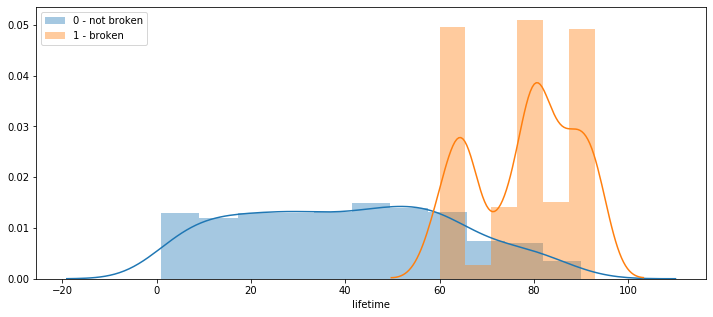

In [22]:
# Numeric (lifetime) v/s Categorical (broken)

plt.figure(figsize=(12,5))
# X axis : Lifetime of the machines ; Y axis : Probability distribution of machines which are damaged (red) & not damaged (blue)
sns.distplot(df.lifetime[df.broken == 0])
sns.distplot(df.lifetime[df.broken == 1])
plt.legend(['0 - not broken', '1 - broken'])
plt.show()

**Conclusion from the above bivariate analytics -** 
    - Almost all machines are surviving upto 60 months.
    - After 60 months / 5 years the machines are starting to get damaged.
    - Lifetime of machines are an important factor.

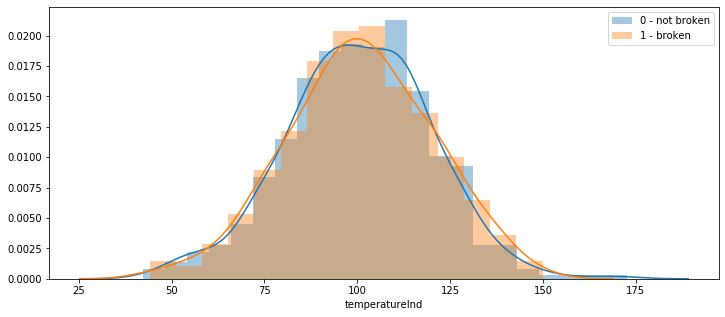

In [23]:
# Numeric (temperature) v/s Categorical (broken)

plt.figure(figsize=(12,5))
# X axis : Temperature of the machines ; Y axis : Probability distribution of machines which are damaged (red) & not damaged (blue)
sns.distplot(df.temperatureInd[df.broken == 0])
sns.distplot(df.temperatureInd[df.broken == 1])
plt.legend(['0 - not broken', '1 - broken'])
plt.show()

**Analytics -**
    - Both the distribution are overlapping
    - So at every point in the distribution the probability of machines damaged = probability of machines not damaged
    - Temperature cannot provide any information as to why machines are damaged - not an important factor

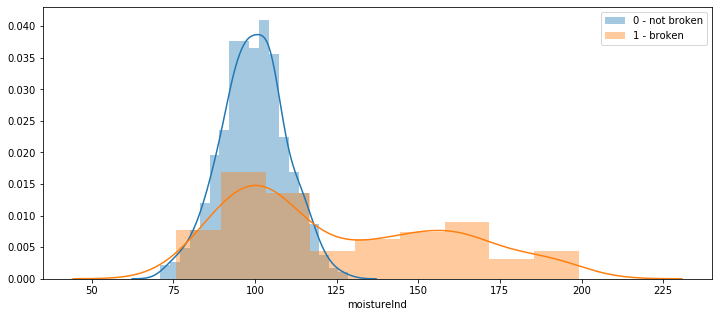

In [24]:
# Numeric (moisture) v/s Categorical (broken)

plt.figure(figsize=(12,5))
# X axis : Moisture content in the machines ; Y axis : Probability distribution of machines which are damaged (red) & not damaged (blue)
sns.distplot(df.moistureInd[df.broken == 0])
sns.distplot(df.moistureInd[df.broken == 1])
plt.legend(['0 - not broken', '1 - broken'])
plt.show()

**Conclusion from the above analytics -**
    - Between 75 and 125 the amount of machines not damaged are more than damaged ones.
    - We can maybe conclude that due to high temperature - leading to corrosion machines are being damaged.
    - Might be an important factor as to why machines are damaged?


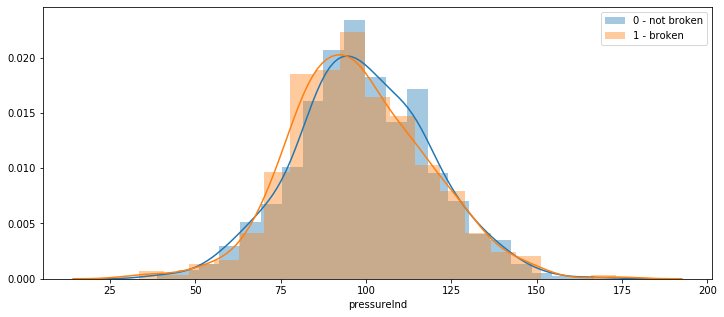

In [25]:
# Numeric (pressure) v/s Categorical (broken)

plt.figure(figsize=(12,5))
# X axis : Pressure on the machines ; Y axis : Probability distribution of machines which are damaged (red) & not damaged (blue)
sns.distplot(df.pressureInd[df.broken == 0])
sns.distplot(df.pressureInd[df.broken == 1])
plt.legend(['0 - not broken', '1 - broken'])
plt.show()

**Analytics -**
    - Normal distribution
    - Pressure doesn't provide any info as to why machines are damaged?

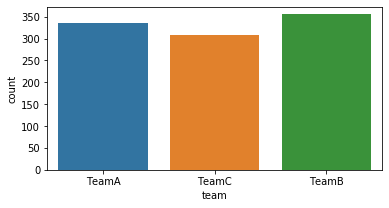

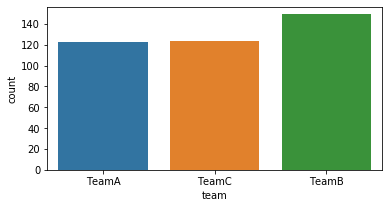

In [26]:
# Categorical (team) v/s Categorical (broken)

# No of machines operated by team A, B, C
plt.figure(figsize=(6,3))
sns.countplot(df['team'], order = df.team.unique())
plt.show()

# Machines damaged being operated by team A,B,C
plt.figure(figsize=(6,3))
sns.countplot(df['team'][df.broken==1], order = df.team.unique())
plt.show()

In [27]:
# No. of machines damaged and not damaged and their count wrt to each team
out = pd.crosstab(df.team, df.broken, margins=True)
out

broken,0,1,All
team,,,
TeamA,213,123,336
TeamB,206,149,355
TeamC,184,124,308
All,603,396,999


In [28]:
# Machines damaged / Total number of machines operatede by each team (%)
out[1] * 100 / out['All']

team
TeamA    36.607143
TeamB    41.971831
TeamC    40.259740
All      39.639640
dtype: float64

In [29]:
# Machines not damaged / Total number of machines operatede by each team (%)
out[0] * 100 / out['All']

team
TeamA    63.392857
TeamB    58.028169
TeamC    59.740260
All      60.360360
dtype: float64

Team A handles the machines most efficiently among the three teams

In [30]:
# Categorical (Provider) v/s Categorical (Broken)
out = pd.crosstab(df.provider, df.broken, margins=True)

# Percentage of machines damaged and their respective providers
out[1] * 100 / out['All']

provider
Provider1    45.454545
Provider2    34.210526
Provider3    47.107438
Provider4    31.932773
All          39.639640
dtype: float64

Analytics :-
    - Machines provided by Provider1 and Provider3 provides higher percentage of damaged machines.

## Multivariate Analysis

    - Numeric v/s Categorical v/s Categorical = Swarmplot / Pointplot
    - Numeric v/s Numeric v/s Categorical = Scatterplot

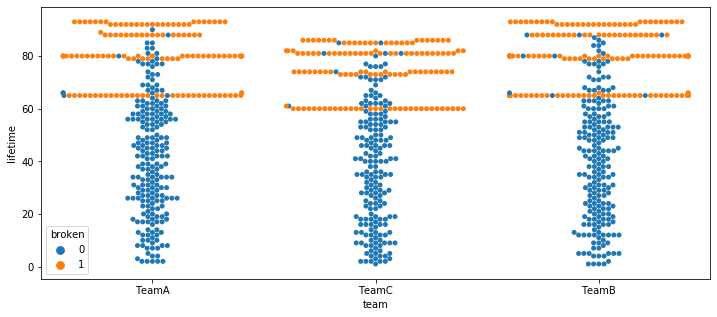

In [31]:
# Numeric(lifetime) v/s Categorical(team) v/s Categorical(broken)

plt.figure(figsize=(12,5))
sns.swarmplot(x='team',y='lifetime',hue='broken',data=df)
plt.show()

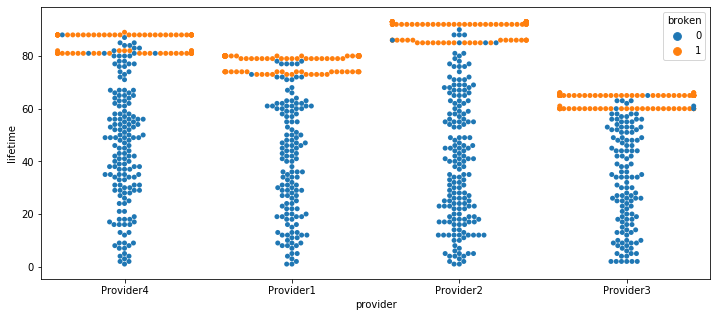

In [33]:
# Numeric(lifetime) v/s Categorical(provider) v/s Categorical(broken)

plt.figure(figsize=(12,5))
sns.swarmplot(x='provider',y='lifetime',hue='broken',data=df)
plt.show()

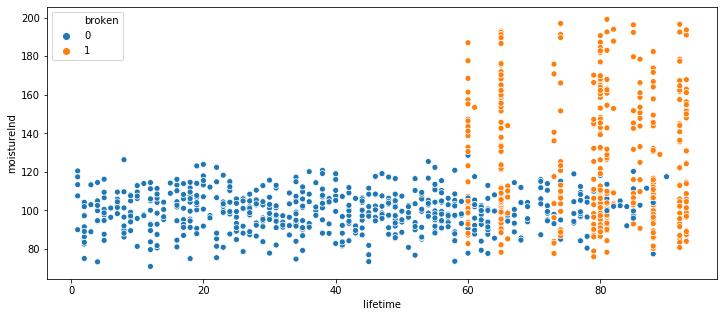

In [34]:
# Numeric(lifetime) v/s Numeric(moisture) v/s Categorical(broken)

plt.figure(figsize=(12,5))
sns.scatterplot(x='lifetime',y='moistureInd',hue='broken',data=df)
plt.show()

# Report

    Red Alerts :-
        - Machines having age > 60 months are damaged
        - Machines generating moisture > 130 are getting damaged
    
    Points to consider :-
        - Machines provided by provider 2 are most qualitative and surviving longer
        - Machines provided by provider 3 are damaged early

### EDA using Statistics

    - numeric v/s numeric = pearson correlation, ANOVA
    - numeric v/s categorical = ANOVA, mutual information
    - categorical v/s categorical = chi square test, mutual information

### Using ANOVA for importance 
 
     For business confidence = 95% (0.95), significance level = 5%
    
        - pvalue <= 0.05 : Null hypothesis is rejected and feature is important
        - pvalue > 0.05 : Null hypothesis is accepted and feature is not important

In [35]:
from sklearn.feature_selection import f_classif
df_num = df[numeric]
fvalue,pvalue = f_classif(df_num,df.broken)
for i in range(len(numeric)):
    print(numeric[i],pvalue[i])

lifetime 2.3998216241510595e-149
pressureInd 0.3598760996196547
moistureInd 3.4011329762401826e-66
temperatureInd 0.7304768479781827


**Analytics** from the above values :-
    - lifetime has a pvalue < 0.05 : Null hypothesis is rejected and feature is important
    - pressureInd has a pvalue > 0.05 : Null hypothesis is accepted and feature is not important
    - moistureInd has a pvalue < 0.05 : Null hypothesis is rejected and feature is important
    - temperatureInd has a pvalue > 0.05 : Null hypothesis is accepted and feature is not important